### Linear Regression model
---
Linear Regression is a supervised learning algorithm used to predict a continuous numeric value (like price, marks, temperature)

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Fetching canada housing prices dataset
housing = fetch_openml(name="house_prices", as_frame=True)

In [3]:
data = pd.DataFrame(housing.data,columns=housing.feature_names)
data["Sale price"] = housing.target

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Sale price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Working with **Null** values

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Sale price         0
Length: 81, dtype: int64

In [6]:
data.drop(columns=["LotFrontage"], inplace=True)

##### Finding integer datatype columns for LinearRegression model

In [7]:
data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Sale price        int64
Length: 80, dtype: object

In [8]:
y = data["Sale price"]
cols = data.select_dtypes(exclude=["int64"]).columns.tolist()

* dropping all the columns excluding integer type cols

In [9]:
data.drop(cols, axis=1, inplace=True)

In [10]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Sale price
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
X = data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

* **Scaling** the data

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

---
Applying model's prediction on training values
<hr>

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

### Plotting
---
Plot shows that model's predictions are accurate

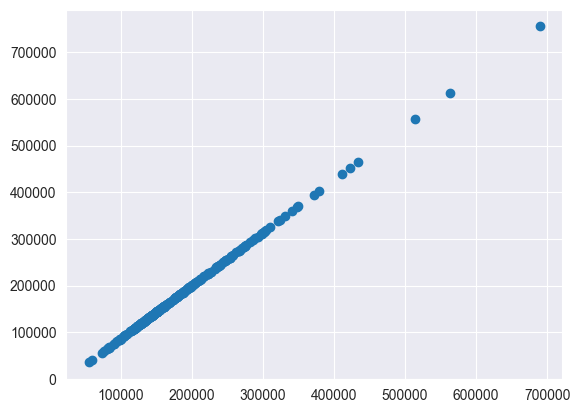

In [14]:
plt.scatter(pred,y_test)

### .score()
---
This returns R² (R-squared), not accuracy.<br>
- 1.0 → perfect predictions

- 0.0 → model no better than predicting the mean

- < 0 → model is worse than useless

Internally, .score() does this:<br>
<pre>
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)</pre>

In [16]:
lr.score(X_train,y_train)

1.0